This is Will's edit of a notebook originally written by Javier.

# Correlations between H II region parameters

We look at correlations between 6 principal measurements that fall into two groups: 

* Basic parameters: 
    * Size: $L$
    * Ionizing luminosity: $Q(\mathrm{H})$
    * Distance: $D$
* Velocity structure function parameters:
    * Velocity dispersion on plane of sky: $\sigma$
    * Velocity autocorrelation length scale: $\ell_0$
    * Structure function slope in inertial range: $m$

Colab's markdown renderer seems to have a bug that requires some math outside of a list in order to trigger latex parsing: $\alpha$. 

## Original table from Javier

In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import lmfit
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
import pickle

In [2]:
Region =["NGC 604","NGC 595","Hubble X","Hubble V","30Dor" ,"Carina","NGC 346","M8"   ,"OrionL","OrionS"]
LHa    =[4.46e39  ,2.29e39  ,3.98e38   ,7.41e38   ,5.74e39 ,3.98e39 ,4.67e38  ,2.95e37,1e37    ,1e37    ]
SFR    =[5.3e-3   ,2.6e-3   ,3.1e-4    ,1.5e-4    ,1.3e-2  ,1.0e-2  ,0.0021   ,1.0e-4 ,5.3e-5  ,5.3e-5  ]
n      =[3        ,4        ,5         ,8         ,250     ,500     ,100      ,60     ,150     ,4000    ] 
Diam   =[400      ,400      ,160       ,130       ,98.9    ,5       ,64       , 25    ,5       ,0.6     ]
R      =[200      ,200      ,80        ,65        ,49.4    ,7.5     ,32       ,12.5   ,2.5     ,0.3     ]
Dist   =[840      ,840      ,500       ,500       ,50      ,2.35    ,61.7     ,1.25   ,0.4     ,0.4     ]
siglos =[16.21    ,18.33    ,12.3      ,13.4      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]
sigW   =[23.1     ,27.1     ,13.4      ,14.7      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]

In [3]:
samples=pd.read_csv('CIresults//list2.csv',header=None)
samples

,0
0,N604H
1,N595
2,HX
3,HV
4,Dor
5,CarC
6,N346
7,M8
8,OrionLH
9,OrionS


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('CIresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('SFresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df

Reults

In [5]:
sig = [[0]*(1) for i in range(len(samples))]
siger = [[0]*(1) for i in range(len(samples))]
sig2 = [[0]*(1) for i in range(len(samples))]
sig2er = [[0]*(1) for i in range(len(samples))]
r0 = [[0]*(1) for i in range(len(samples))]
r0er = [[0]*(1) for i in range(len(samples))]
m = [[0]*(1) for i in range(len(samples))]
mer = [[0]*(1) for i in range(len(samples))]

for i in range(len(samples)):
    sig[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value,4)**0.5
    siger[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].stderr,4)**0.5
    sig2[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].value,4)
    r0[i] = np.round(CI[samples[0][i]]['resultCI'].params['r0'].value,4)
    m[i] = np.round(CI[samples[0][i]]['resultCI'].params['m'].value,4)
    sig2er[i] = np.round(CI[samples[0][i]]['resultCI'].params['sig2'].stderr,4)
    r0er[i] = np.round(CI[samples[0][i]]['resultCI'].params['r0'].stderr,4)
    mer[i] = np.round(CI[samples[0][i]]['resultCI'].params['m'].stderr,4)
  

In [6]:
data = pd.DataFrame(
    {
       "Region": Region,
       "LHa": LHa,
       "SFR": SFR,
       "n": n,
       "L [pc]": Diam,
       "R [pc]": R,
       "Dist [kpc]": Dist,
       "sig2 [km/s]": sig2,
       "sig2er": sig2er,
       "sig [km/s]": sig,
       "siger": siger,
       "m": m,
       "mer": mer,
       "r0 [pc]": r0,
       "r0er": r0er,
       "siglos [km/s]": siglos,
      
    },
)

Checar que los tipos de las columnas sean adecuadas:

In [7]:
data.dtypes

Region            object
LHa              float64
SFR              float64
n                  int64
L [pc]           float64
R [pc]           float64
Dist [kpc]       float64
sig2 [km/s]      float64
sig2er           float64
sig [km/s]       float64
siger            float64
m                float64
mer              float64
r0 [pc]          float64
r0er             float64
siglos [km/s]    float64
dtype: object

In [8]:
data

,Region,LHa,SFR,n,L [pc],R [pc],Dist [kpc],sig2 [km/s],sig2er,sig [km/s],siger,m,mer,r0 [pc],r0er,siglos [km/s]
0,NGC 604,4.460000e+39,0.005300,3,400.0,200.0,840.00,45.2227,4.5223,6.724783,2.126570,1.4723,0.1472,6.4296,0.6430,16.21
1,NGC 595,2.290000e+39,0.002600,4,400.0,200.0,840.00,40.3020,2.9643,6.348386,1.721714,1.3895,0.1702,7.5253,0.6397,18.33
2,Hubble X,3.980000e+38,0.000310,5,160.0,80.0,500.00,13.2886,1.3289,3.645353,1.152779,1.1077,0.1108,3.2118,0.3212,12.30
3,Hubble V,7.410000e+38,0.000150,8,130.0,65.0,500.00,9.1343,0.9134,3.022300,0.955720,0.9045,0.0904,2.1588,0.2159,13.40
4,30Dor,5.740000e+39,0.013000,250,98.9,49.4,50.00,333.4237,33.3424,18.259893,5.774288,0.7568,0.0757,4.4685,0.4469,31.70
5,Carina,3.980000e+39,0.010000,500,5.0,7.5,2.35,15.5295,1.5530,3.940749,1.246194,1.2593,0.1259,0.5514,0.0551,22.46
6,NGC 346,4.670000e+38,0.002100,100,64.0,32.0,61.70,37.4952,3.7495,6.123332,1.936363,0.7522,0.0752,1.7526,0.1753,10.20
7,M8,2.950000e+37,0.000100,60,25.0,12.5,1.25,6.8675,0.6868,2.620592,0.828734,1.0882,0.1088,0.9703,0.0970,13.60
8,OrionL,1.000000e+37,0.000053,150,5.0,2.5,0.40,10.6832,1.0683,3.268516,1.033586,1.6296,0.1630,1.0014,0.1001,6.00
9,OrionS,1.000000e+37,0.000053,4000,0.6,0.3,0.40,9.1788,0.9179,3.029653,0.958071,1.1361,0.1136,0.0405,0.0041,6.00


## Change to log scale for most parameters

El analisis de la mayoría de las columnas sería mejor en escala logarítmica porque varían por varios ordenes de magnitud.  Entonces, hacemos una nueva versión de la tabla así. Dejamos la $m$ en escala lineal porque no varía mucho.

In [9]:
cols = data.columns
logdata = data.copy()
for col in cols:
    if col not in ["Region", "m", "mer", "r0er", "siger",  "sig2er",]:
        logdata[col] = np.round(np.log10(logdata[col]), 2)
        logdata.rename(columns={col: f"log {col}"}, inplace=True)
# Some minor changes to column names
logdata.rename(
    columns={
        "log LHa": "log L(H) [erg s^-1]",
        }, 
    inplace=True)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,1.66,4.5223,0.83,2.126570,1.4723,0.1472,0.81,0.6430,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,1.61,2.9643,0.80,1.721714,1.3895,0.1702,0.88,0.6397,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,1.12,1.3289,0.56,1.152779,1.1077,0.1108,0.51,0.3212,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.96,0.9134,0.48,0.955720,0.9045,0.0904,0.33,0.2159,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,2.52,33.3424,1.26,5.774288,0.7568,0.0757,0.65,0.4469,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,1.19,1.5530,0.60,1.246194,1.2593,0.1259,-0.26,0.0551,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,1.57,3.7495,0.79,1.936363,0.7522,0.0752,0.24,0.1753,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.84,0.6868,0.42,0.828734,1.0882,0.1088,-0.01,0.0970,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,1.03,1.0683,0.51,1.033586,1.6296,0.1630,0.00,0.1001,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.96,0.9179,0.48,0.958071,1.1361,0.1136,-1.39,0.0041,0.78


Uncertainties Log Space

In [10]:
logdata['mer']=(data['mer']/data['m'])*0.434

In [11]:
logdata['r0er']=(data['r0er']/data['r0 [pc]'])*0.434

In [12]:
logdata['siger']=(data['siger']/data['sig [km/s]'])*0.434

In [13]:
logdata['sig2er']=(data['sig2er']/data['sig2 [km/s]'])*0.434

Make the label text bigger on the figures

In [14]:
sns.set_context("talk")

Repeat the pair plot of correlations between columns with the log-scale quantities. Use color to indicate the distance to the regions.

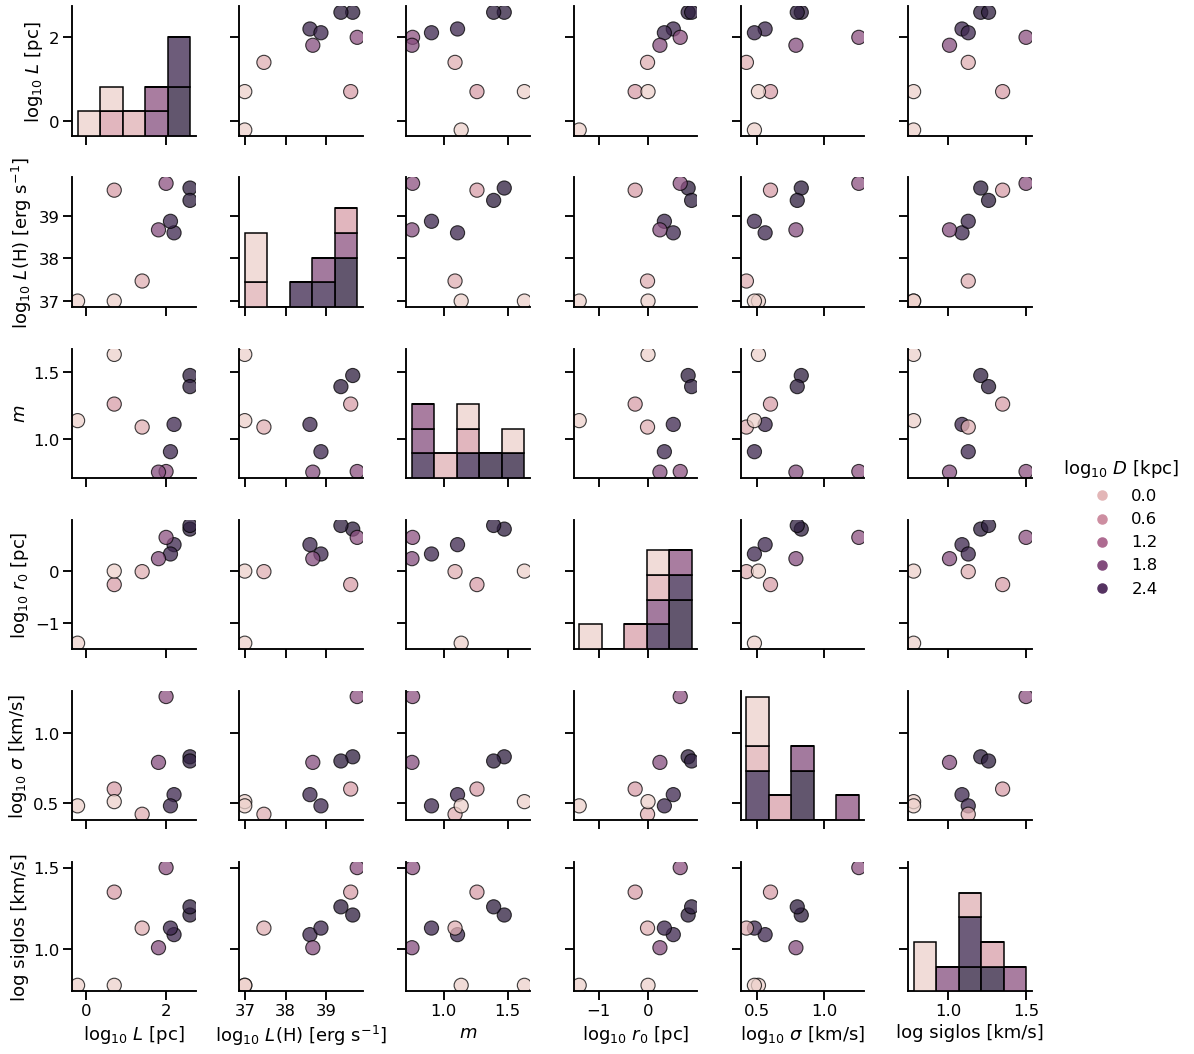

In [15]:
selected_vars = [ "log L [pc]","log L(H) [erg s^-1]", "log Dist [kpc]", "m", "log r0 [pc]", "log sig [km/s]", "log siglos [km/s]"]
plotdata = logdata[selected_vars].rename(
    columns={
        # Switch column names to use latex formatting to improve axis labels
        "log L [pc]": r"$\log_{10}\ L$ [pc]", 
        "log L(H) [erg s^-1]": r"$\log_{10}\ L(\mathrm{H})$ [erg s$^{-1}$]", 
        "m": "$m$", 
        "log r0 [pc]": r"$\log_{10}\ r_0$ [pc]", 
        "log sig [km/s]": r"$\log_{10}\ \sigma$ [km/s]", 
        "log Dist [kpc]": r"$\log_{10}\ D$ [kpc]",
    },
)

sns.pairplot(plotdata, 
             hue=r"$\log_{10}\ D$ [kpc]",
             plot_kws=dict(alpha=0.75, s=200, edgecolor="k"), 
             diag_kind='hist',
             diag_kws= dict(multiple='stack'),
             );

figname = "strucfunc-correlations"
# Save PDF and JPG versions of the figure
#plt.gcf().savefig(f"{figname}.pdf")
#plt.gcf().savefig(f"{figname}.jpg")

## Correlation coefficients

Calculate [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, between each pair of variables:

In [16]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,-0.130402,0.945210,0.465355,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,-0.207904,0.675012,0.679813,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,-0.179601,0.800242,0.407921,0.477683
m,-0.130402,-0.207904,-0.179601,1.000000,0.005887,-0.314177,-0.294002
log r0 [pc],0.945210,0.675012,0.800242,0.005887,1.000000,0.537424,0.593752
log sig [km/s],0.465355,0.679813,0.407921,-0.314177,0.537424,1.000000,0.660593
log siglos [km/s],0.555372,0.875549,0.477683,-0.294002,0.593752,0.660593,1.000000


So the results for correlations between the basic parameters are what we would expect:

- Size is moderately correlated with luminosity ($r = 0.67$).  The correlation is only weak because size will also depend on ambient density and the age of the region. 
- Size is highly correlated with distance ($r = 0.92$).  This is just a selection effect due to the fact that we tend to choose regions that have an angular size that matches our instruments. 
- Luminosity–distance correlation is the weakest ($r = 0.71$), and can be explained as being due to the previous two.



The correlations of the structure function parameters with the basic parameters are very interesting:
- Autocorrelation length scale, $r_0$, is *highly* correlated ($r = 0.96$) with region size, $L$.  Looking at the graph, the relation seems to be approximately linear with $\ell_0 \approx 0.1 L$.  How much of this correlation is real and how much is down to selection effects is something we need to consider carefully.
- Velocity dispersion, $\sigma$, is well correlated ($r = 0.71$) with luminosity, $L(\mathrm{Ha})$.  
- The structure function slope $m$ is well correlated ($r = 0.73$) with distance.  This is mainly because $m \approx 1.6$ for all the distant regions observed with TAURUS and ISIS, but is around $m = 1$ for all the nearby regions.  I suspect that this is mainly a data quality issue: we observe very little of the inertial range in the distant regions, so the determination of $m$ is probably not so reliable.  But I am not sure why this would tend to bias $m$ towards high values.  

## Significance tests

We can calculate the statistical significance of the correlations by using the Student t-statistic.  We test the null hypothesis that a given pair of variables is truly uncorrelated ($r = 0$) for the underlying population and that the observed $r$ for our sample of $N = 9$ sources arises solely by chance.  We want to calculate the $p$-value, which is the probability of obtaining $r$ greater than or equal to the observed value, given that there is no true correlation.  A small value of $p$ means that the null hypothesis can be rejected at a certain confidence level.  

First we calculate the t-statistic from the Pearson correlation coefficient:
$$
t = r \, \left(\frac{N - 2}{1 - r^2}\right)^{1/2}
$$
Then, we use the cumulative distribution function (CDF) of the t-distribution with $N - 1$ degrees of freedom to find the p-value. 

In [17]:
def tstatistic(r, n):
    """Compute Student t statistic for null hypothesis of no correlation
    for an observed Pearson correlation of `r` from `n` samples
    """
    return r*np.sqrt((n - 2) / (1 - r**2))

In [18]:
import scipy.stats

In [19]:
def p_from_t(t, n):
    """Compute 1-sided p-value from Student statistic `t` with `n` observations"""
    # sf is survival function: 1 - CDF
    return scipy.stats.t.sf(t, n-1)
    

In [20]:
N = 9
rvals = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.779, 0.8, 0.9, 0.908, 0.95, 0.981])
tvals = tstatistic(rvals, N)
pvals = p_from_t(tvals, N)
pd.DataFrame(
    {"r": rvals, "t": tvals, "p": pvals}
)

,r,t,p
0,0.000,0.000000,5.000000e-01
1,0.200,0.540062,3.019294e-01
2,0.400,1.154701,1.407685e-01
3,0.500,1.527525,8.257494e-02
4,0.600,1.984313,4.124805e-02
5,0.700,2.593355,1.597303e-02
6,0.779,3.287020,5.535582e-03
7,0.800,3.527668,3.879201e-03
8,0.900,5.462793,2.997718e-04
9,0.908,5.733922,2.184923e-04


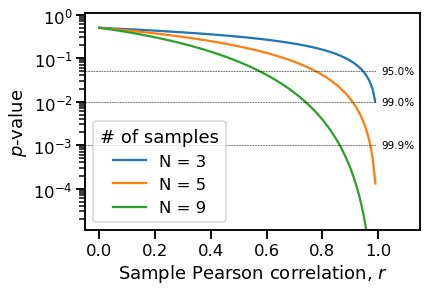

In [21]:
fig, ax = plt.subplots()
for N in 3, 5, 9:
    rvals = np.linspace(0.0, 1.0, 100, endpoint=False)
    tvals = tstatistic(rvals, N)
    pvals = p_from_t(tvals, N)
    ax.plot(rvals, pvals, label=f"N = {N}")
for p0 in 0.05, 0.01, 0.001:
    ax.axhline(p0, color="k", ls="--", lw=0.5)
    ax.text(1.07, p0, f"{100*(1-p0):.1f}%", 
            va="center", ha="center", fontsize="xx-small", 
            bbox={"color": "w"})
ax.legend(title="# of samples")
ax.set(
    xlabel="Sample Pearson correlation, $r$",
    ylabel="$p$-value",
    yscale="log",
    xlim=[-0.05, 1.15],
    ylim=[1.1e-5, 1.1],
);

I have marked confidence levels for nominal $p$-values of 0.05, 0.01, and 0.001, which are often used to judge significance.   This implies that all the correlations that we listed above are highly significant.  For instance, the correlation of $\sigma$ with luminosity, with $r=0.77$, has $p = 0.011$, so close to the 99% confidence level. 

Despite the good correlation, there is a factor of 4 difference in $\sigma$ between Carina and 30~Dor, despite similar luminosities.  **Need to check these luminostiy values**. 

In [22]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,1.66,0.043400,0.83,0.137243,1.4723,0.043391,0.81,0.043403,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,1.61,0.031922,0.80,0.117703,1.3895,0.053161,0.88,0.036893,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,1.12,0.043401,0.56,0.137245,1.1077,0.043412,0.51,0.043403,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.96,0.043399,0.48,0.137241,0.9045,0.043376,0.33,0.043404,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,2.52,0.043400,1.26,0.137243,0.7568,0.043411,0.65,0.043405,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,1.19,0.043401,0.60,0.137245,1.2593,0.043390,-0.26,0.043369,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,1.57,0.043400,0.79,0.137242,0.7522,0.043388,0.24,0.043410,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.84,0.043403,0.42,0.137248,1.0882,0.043392,-0.01,0.043387,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,1.03,0.043399,0.51,0.137242,1.6296,0.043411,0.00,0.043383,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.96,0.043401,0.48,0.137244,1.1361,0.043396,-1.39,0.043936,0.78


In [23]:
#logdata=logdata.drop(9, axis=0)
#logdata

r0 vs m

In [24]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','m', 'mer']]

In [25]:
Y=np.log10(Y)

[Text(0, 0.5, 'log$ m$'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

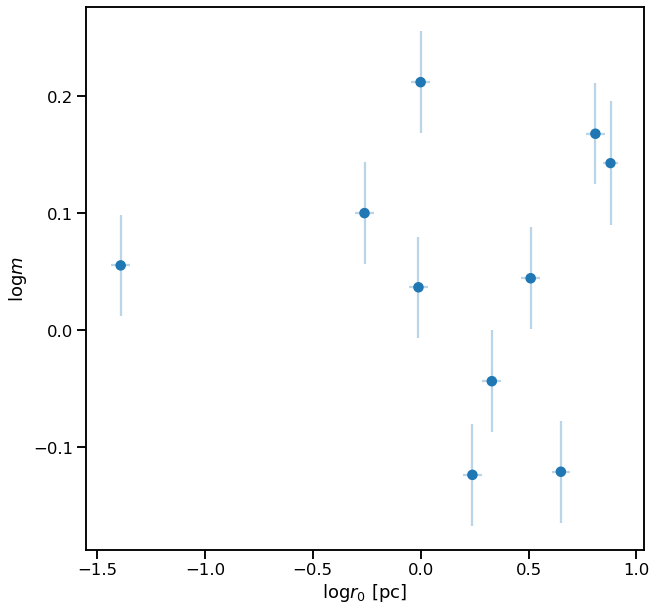

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log$ m$",
)
#ax.set_aspect("equal")
#sns.despine()

In [27]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [28]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00323461 1.03684681 0.99389994 0.99630815 1.00688759 1.03919429]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99832462 1.00894273 1.00432658 0.99598638 1.00296061 1.00817213]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99838994 1.0059319  1.00508277 0.99711932 1.00005818 1.00788342]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9985505  1.00329739 1.00451989 0.99773893 0.99992685 1.00285691]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00056283 0.99958981 1.00211199 1.00000521 0.99994118 1.00002199]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00148859 1.00022806 1

Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0000725  0.99983636 1.00026068 1.00058214 0.99993274 0.99985751]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00000335 0.99985181 1.00020127 1.00052992 0.99993412 0.99988257]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00001962 0.99984941 1.00028222 1.00040568 0.99987811 0.99989025]


In [29]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.007595,0.063033,0.014798,"[0.20151109411750248, 0.7984889058824977]","[0.7652987235683517, 0.11818145455130556]","[0.09318154012791169, 0.6899904946734807]",0.103797,0.349632,0.293374,0.248583,0.798190,0.382197
1,0.046620,0.061212,0.016197,"[0.5022103994341504, 0.4977896005658497]","[0.26848949428866203, -0.008652497789429704]","[0.09668306204778875, 0.40910189831671423]",0.124763,0.078118,0.126896,0.130531,0.520964,0.243053
2,0.008554,-0.009310,0.026022,"[0.6452206995912423, 0.3547793004087577]","[0.13955350487729098, 0.19663921941656892]","[0.1422493731411672, 0.6423456067089262]",0.551709,0.256108,0.366649,0.159806,0.566056,-0.032652
3,0.051809,-0.055742,0.028435,"[0.44412008201963465, 0.5558799179803654]","[0.3305587632920422, -0.03619749915121118]","[0.10081262445511473, 0.7371369353903827]",0.532648,0.526027,0.048715,0.126686,0.698384,-0.224946
4,0.037217,-0.018024,0.006462,"[0.5689332981876568, 0.43106670181234313]","[0.10319671177831147, 0.5145447171512565]","[0.33200620071536313, 0.28059599231414356]",0.952592,0.346289,1.334394,0.280515,0.592742,-0.131745
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.097919,0.032305,0.013730,"[0.3810592775342882, 0.6189407224657117]","[-0.01283184913076816, 0.22469040957375727]","[0.8527766664355844, 0.45239003330653554]",-0.190014,0.179794,0.263841,0.134180,0.786300,0.211867
9996,0.014722,0.072669,0.017878,"[0.29192800410737246, 0.7080719958926275]","[-0.24715840167522876, 0.016125838081731958]","[4.108620569455812, 0.4749623582765594]",0.608715,0.134283,0.585303,-0.060734,1.245013,0.560411
9997,0.073508,-0.064111,0.025021,"[0.1496775549851292, 0.8503224450148709]","[0.6182863612716674, 0.5765035465661635]","[1.820568154888469, 0.5566085983236521]",1.196809,0.502162,0.827087,0.582757,0.863723,-0.330408
9998,-0.087844,-0.095814,0.020860,"[0.12368730394345206, 0.8763126960565479]","[0.9124829220566326, 0.03710615107321302]","[1.4057107780316629, 0.23928119456621896]",0.165057,0.271281,0.299683,0.145379,0.683089,-0.412757


In [30]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.049086,-0.007336,0.027328,0.164090,0.287762,0.543242,0.209689,1.002837,-0.036710
std,0.055529,0.087146,0.027231,0.518639,0.181026,0.541529,0.248263,4.302117,0.378233
min,-0.313690,-0.586222,0.002709,-2.561297,0.000302,0.000833,-1.077414,0.296853,-0.999908
25%,0.015249,-0.057601,0.013242,-0.137740,0.131803,0.191189,0.059209,0.628601,-0.306346
50%,0.048769,-0.007759,0.020207,0.184204,0.262539,0.379812,0.217066,0.763138,-0.040803
75%,0.081694,0.043188,0.032254,0.477832,0.430606,0.711721,0.363490,0.960097,0.228349
max,0.424219,0.575639,0.718085,2.518437,0.661231,9.080723,1.539021,386.013572,0.999848


In [31]:
pearsonr(X, Y)

(-0.035787905692279944, 0.9218141460147097)

In [32]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.176000,0.042799,0.047134,0.044373
std,0.664132,0.002082,0.115302,0.003088
min,-1.390000,0.036893,-0.123667,0.043376
25%,-0.007500,0.043384,-0.023516,0.043390
50%,0.285000,0.043403,0.049919,0.043394
75%,0.615000,0.043405,0.132176,0.043411
max,0.880000,0.043936,0.212081,0.053161


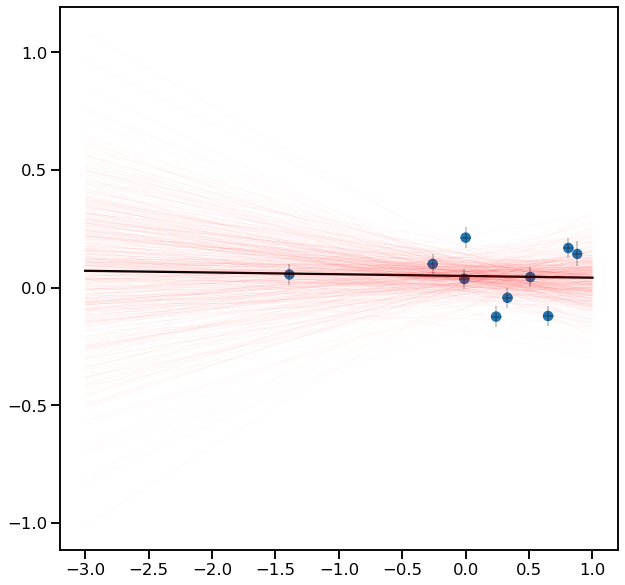

In [33]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [34]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.04908606764712717, -0.007336317052247028)

In [35]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.055529207122345006, 0.08714636990376856)

In [36]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                   0.04163
Date:                Thu, 14 Oct 2021   Prob (F-statistic):              0.843
Time:                        18:30:12   Log-Likelihood:                 7.8970
No. Observations:                  10   AIC:                            -11.79
Df Residuals:                       8   BIC:                            -11.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0457      0.040      1.148      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


r0 vs sig

In [37]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

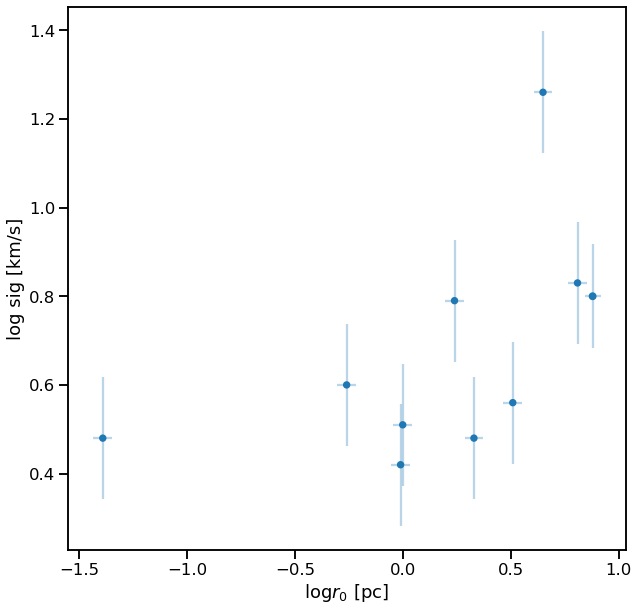

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [39]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [40]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0151795  1.01819661 1.00943518 1.05282123 1.00066929 0.99962785]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00024228 1.00491446 0.9991632  1.02032791 1.00039619 1.00193358]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99775212 0.99984178 1.00445499 1.00562981 0.99996711 0.99876775]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99828616 0.9985814  1.00292487 1.01468436 1.00190286 0.99915308]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99944231 0.99884378 1.00358329 1.0080163  1.00085607 0.99866369]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99885673 0.99842286 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99991219 1.00004545 1.00017107 1.00136775 0.99999589 1.00026987]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9999349  1.00010587 1.00027743 1.00134043 0.99999583 1.00024951]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99992196 1.00013066 1.00030276 1.00123604 0.99993137 1.00028796]


In [41]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.702753,0.351778,0.044888,"[0.24791135619059287, 0.7520886438094072]","[-0.8319800294083544, 0.32430957028927787]","[0.5033470680055637, 0.270365760237212]",-0.101749,0.406596,0.760495,0.037652,0.759876,0.783691
1,0.652756,0.171744,0.075633,"[0.05598327143348155, 0.9440167285665184]","[-0.23183128994801877, 0.20518495118783475]","[3.9192990944805177, 0.21048330876596236]",-0.046209,0.274206,0.336518,0.180719,0.654376,0.378284
2,0.572638,0.218059,0.051343,"[0.38534481442033114, 0.6146551855796689]","[-0.0029282990724564667, 0.3521243485169785]","[1.1407364200662602, 0.1862466926230862]",-0.017539,0.123759,0.269232,0.215307,0.764142,0.592430
3,0.637498,0.387020,0.102676,"[0.4553419485622744, 0.5446580514377257]","[-0.0125228049085825, 0.4508228285348168]","[0.6786926642059327, 0.11135950765779175]",0.083811,0.556853,1.300059,0.239842,0.650334,0.617708
4,0.528601,0.107226,0.055622,"[0.33878364308461134, 0.6612163569153886]","[0.48310904829801066, 0.6927265752894208]","[1.5650831412419268, 0.15443483088375248]",0.237119,0.600037,1.465620,0.621712,0.801363,0.342326
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.658357,0.129882,0.021350,"[0.4628726015932809, 0.5371273984067191]","[-0.7632183236867816, 0.1942455039592194]","[0.6299385654344358, 0.5086271794394371]",-0.577066,0.188864,0.978918,-0.248938,0.890337,0.620583
9996,0.591359,0.229903,0.018824,"[0.1393010053765077, 0.8606989946234923]","[-0.285991923933142, 0.05241529514924766]","[0.6231813680463093, 0.35395094521748416]",-0.401823,0.133521,0.369734,0.005275,0.636542,0.729531
9997,0.508854,0.274722,0.012254,"[0.13937461481066138, 0.8606253851893386]","[-0.1538497230179741, 0.03566497052265325]","[0.6162673071543031, 0.45660596002953724]",-0.074563,0.065894,0.143151,0.009251,0.695102,0.865150
9998,0.579722,0.209955,0.018070,"[0.05479671201277894, 0.9452032879872211]","[-0.1490914322357638, 0.09824631589196192]","[1.3637360849985671, 0.22574856198929583]",-0.426106,0.431400,0.530881,0.084693,0.539699,0.644509


In [42]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.639185,0.207904,0.083974,0.154546,0.286182,0.533302,0.205648,0.992442,0.501980
std,0.104470,0.164469,0.097173,0.527769,0.179367,0.514645,0.251402,3.954410,0.327840
min,-0.389677,-0.817198,0.001220,-2.455593,0.001002,0.000687,-1.389150,0.309714,-0.995057
25%,0.579268,0.113746,0.033345,-0.149674,0.131389,0.191092,0.054305,0.627587,0.313325
50%,0.640480,0.207740,0.057692,0.171757,0.262866,0.385385,0.211958,0.763738,0.565718
75%,0.698876,0.301917,0.098470,0.469995,0.426889,0.704609,0.364751,0.958272,0.753761
max,1.509022,1.479499,2.657203,2.459082,0.661513,7.270147,1.433626,326.580789,0.999999


In [43]:
pearsonr(X, Y)

(0.5374242957232844, 0.10913603635427907)

In [44]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.176000,0.042799,0.673000,0.135290
std,0.664132,0.002082,0.254342,0.006179
min,-1.390000,0.036893,0.420000,0.117703
25%,-0.007500,0.043384,0.487500,0.137242
50%,0.285000,0.043403,0.580000,0.137243
75%,0.615000,0.043405,0.797500,0.137245
max,0.880000,0.043936,1.260000,0.137248


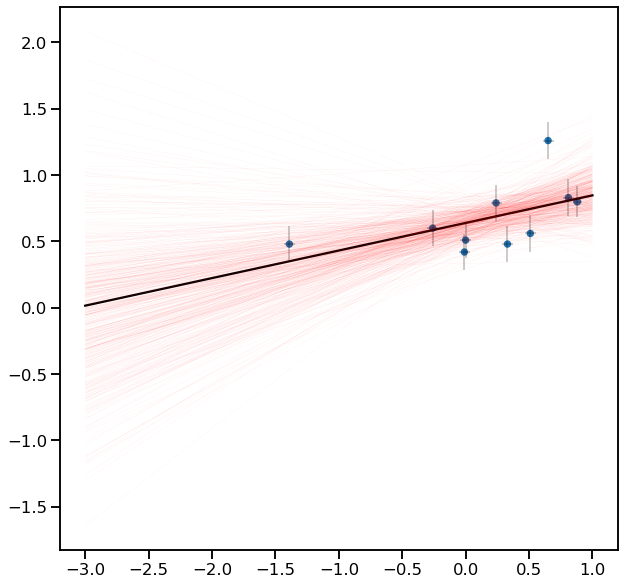

In [45]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [46]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.6391853774124324, 0.20790411420466243)

In [47]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.10447049291867408, 0.16446922596104552)

In [48]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.295
Model:                            WLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.354
Date:                Thu, 14 Oct 2021   Prob (F-statistic):              0.104
Time:                        18:30:19   Log-Likelihood:                 1.8846
No. Observations:                  10   AIC:                            0.2307
Df Residuals:                       8   BIC:                            0.8359
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6364      0.074      8.581      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


sig vs m

In [49]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log sig [km/s]', 'siger','m', 'mer']]

In [50]:
Y=np.log10(Y)

[Text(0, 0.5, 'log m'), Text(0.5, 0, 'log sig [km/s]')]

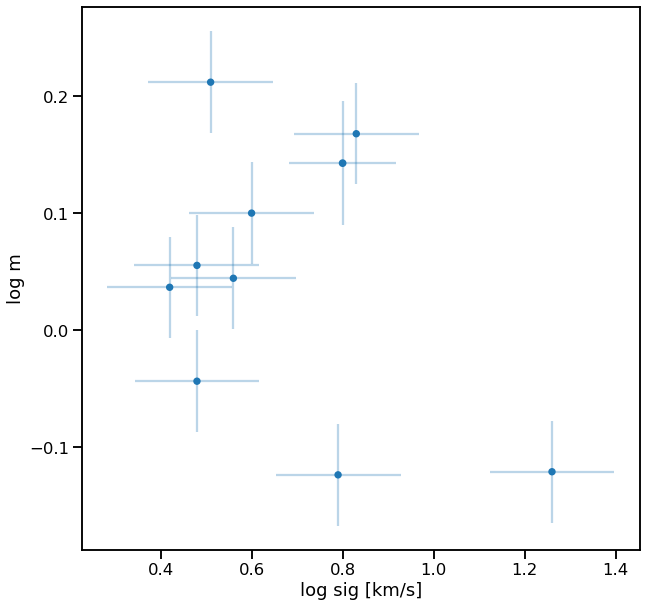

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log sig [km/s]", ylabel=r"log m",
)
#ax.set_aspect("equal")
#sns.despine()

In [52]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [53]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00746094 1.012043   1.04675569 1.01312916 0.99997416 1.00397292]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00060915 1.00072951 0.99681603 1.00362675 0.99990985 0.99708026]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.000078   1.00020212 0.99988172 1.002612   0.99987279 1.00190969]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9997842  0.99930617 0.99864409 1.00050833 1.0024308  1.00107347]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00018421 0.99977955 0.99881047 0.99952439 0.99978418 0.99955143]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00001046 1.00004534 0


Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00015854 1.00006692 1.00045672 1.00122856 0.99988627 0.99985845]


In [54]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.366134,-0.408386,0.012273,"[0.13660371822538564, 0.8633962817746145]","[0.9451086172724981, 0.6829562688796065]","[0.19631232855874142, 0.013210285115131844]",0.960427,0.048929,0.051474,0.718767,0.215240,-0.621555
1,0.050835,0.073958,0.040053,"[0.3590054736810678, 0.6409945263189323]","[0.9448376995910397, 0.6442880278979849]","[0.019754895499945573, 0.018169160948626955]",0.841690,0.010831,0.024326,0.752187,0.198810,0.073272
2,0.199692,-0.229551,0.096052,"[0.5937459625937627, 0.4062540374062372]","[0.8563376229011088, 0.6310134362309787]","[0.038517660679111436, 0.0061147058795995935]",0.865566,0.038439,0.018820,0.764799,0.193908,-0.142164
3,0.706659,-0.755520,0.050008,"[0.5348714397450623, 0.46512856025493765]","[0.8483751351685236, 0.616478170601604]","[0.03503593938054305, 0.004665966995391957]",0.703430,0.012104,0.027409,0.740513,0.185172,-0.530370
4,0.634750,-0.804614,0.019000,"[0.5394809902397749, 0.4605190097602251]","[0.8601906004035373, 0.6872386167580011]","[0.023286698505246003, 0.006564485862830807]",0.711201,0.037910,0.011751,0.780543,0.151714,-0.662987
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.284187,-0.300711,0.022814,"[0.19901451955576324, 0.8009854804442368]","[0.5957400733707253, 0.7155429713351255]","[0.0672783072459876, 0.02568252065774552]",0.745615,0.022638,0.015957,0.691700,0.190391,-0.354443
9996,-0.049252,0.124382,0.014703,"[0.29476578222467775, 0.7052342177753222]","[0.832217126100371, 0.7149576092776565]","[0.04990737812278525, 0.014636731517643442]",0.773869,0.003443,0.011593,0.749522,0.167008,0.168853
9997,0.094633,-0.011531,0.028996,"[0.2684119821706142, 0.7315880178293859]","[0.7303882522331712, 0.8001852173911157]","[0.014638767106809902, 0.024776776486107717]",0.828845,0.069601,0.042218,0.781451,0.151698,-0.010272
9998,-0.412213,0.547152,0.060449,"[0.31031571719489354, 0.6896842828051064]","[0.6816771985056891, 0.792355949450992]","[0.0649996123368014, 0.10629705542014145]",0.610326,0.011029,0.056340,0.758011,0.310006,0.567866


In [55]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.219456,-0.254891,0.021362,0.682899,0.036540,0.057585,0.668463,0.340428,-0.383433
std,0.271159,0.400053,0.023410,0.184297,0.026393,0.065619,0.090101,1.775464,0.381121
min,-5.177139,-8.564915,0.000485,-0.386315,0.000027,0.000052,0.218661,0.020525,-1.000000
25%,0.098792,-0.428383,0.009330,0.574560,0.013921,0.015795,0.610660,0.185049,-0.679971
50%,0.219436,-0.254662,0.015304,0.678290,0.030599,0.036382,0.666842,0.240817,-0.439733
75%,0.340510,-0.083312,0.025226,0.787623,0.056148,0.074115,0.723262,0.317067,-0.145845
max,6.083253,8.266775,0.676839,1.719066,0.097014,0.982852,1.179544,111.922067,0.999998


In [56]:
pearsonr(X, Y)

(-0.37682130523390894, 0.2831140727210786)

In [57]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.673000,0.135290,0.047134,0.044373
std,0.254342,0.006179,0.115302,0.003088
min,0.420000,0.117703,-0.123667,0.043376
25%,0.487500,0.137242,-0.023516,0.043390
50%,0.580000,0.137243,0.049919,0.043394
75%,0.797500,0.137245,0.132176,0.043411
max,1.260000,0.137248,0.212081,0.053161


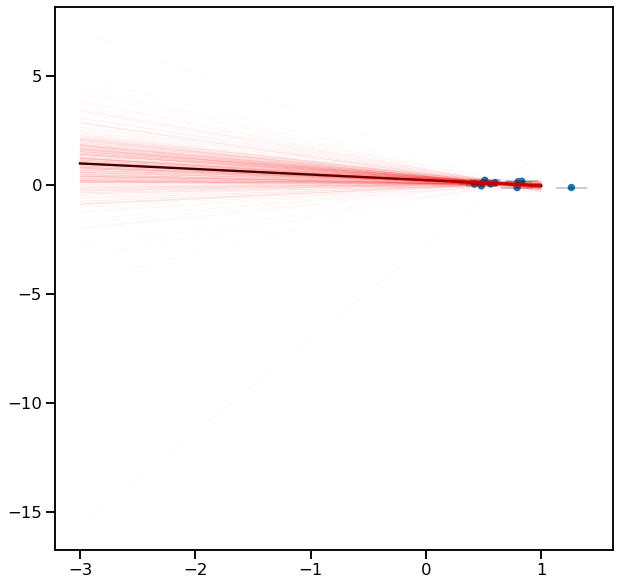

In [58]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [59]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.21945642993326434, -0.25489085483813606)

In [60]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.2711593305528359, 0.400053312121591)

In [61]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.160
Model:                            WLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.521
Date:                Thu, 14 Oct 2021   Prob (F-statistic):              0.253
Time:                        18:30:26   Log-Likelihood:                 8.7412
No. Observations:                  10   AIC:                            -13.48
Df Residuals:                       8   BIC:                            -12.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1639      0.104      1.

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Diam(R) vs r0

In [62]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r0 [pc]', 'r0er']]

[Text(0, 0.5, 'log r0 [pc]'), Text(0.5, 0, 'log L [pc]')]

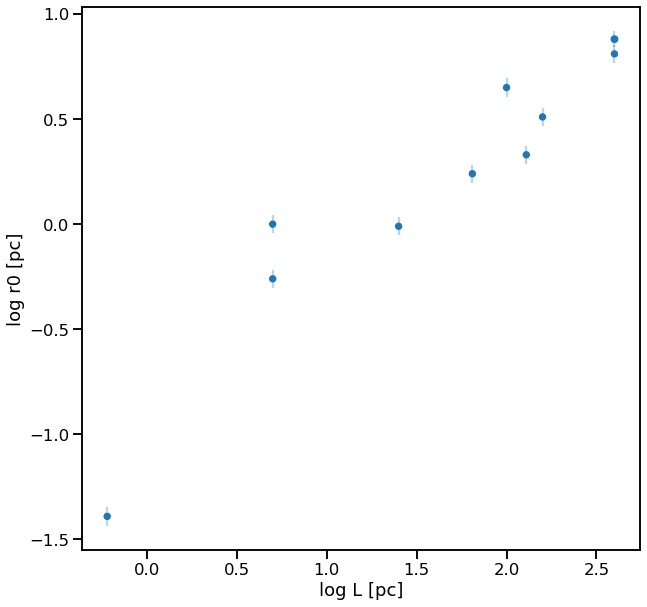

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log L [pc]", ylabel=r"log r0 [pc]",
)
#ax.set_aspect("equal")
#sns.despine()

In [64]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:            log r0 [pc]   R-squared:                       0.897
Model:                            WLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.84
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.18e-05
Time:                        18:30:26   Log-Likelihood:                 1.8060
No. Observations:                  10   AIC:                            0.3880
Df Residuals:                       8   BIC:                            0.9932
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8932      0.150     -5.973      0.0

L vs sig

In [65]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log L(H) [erg s^-1]')]

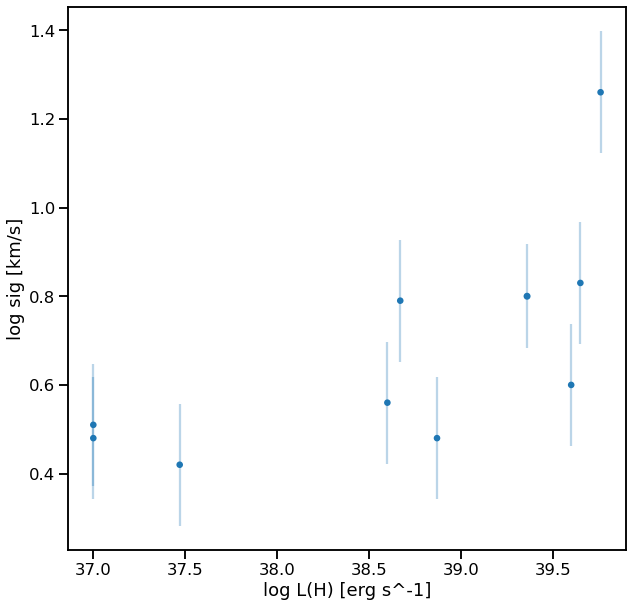

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log L(H) [erg s^-1]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [67]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.467
Model:                            WLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     7.016
Date:                Thu, 14 Oct 2021   Prob (F-statistic):             0.0293
Time:                        18:30:26   Log-Likelihood:                 3.2824
No. Observations:                  10   AIC:                            -2.565
Df Residuals:                       8   BIC:                            -1.960
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5102    

In [68]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]', 'siger']]

In [69]:
x,y=Y,X
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     log L(H) [erg s^-1]   R-squared:                       0.462
Model:                             OLS   Adj. R-squared:                  0.395
Method:                  Least Squares   F-statistic:                     6.874
Date:                 Thu, 14 Oct 2021   Prob (F-statistic):             0.0306
Time:                         18:30:27   Log-Likelihood:                -11.333
No. Observations:                   10   AIC:                             26.67
Df Residuals:                        8   BIC:                             27.27
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.6550      0.7

Distance (D) vs m

In [70]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm', 'mer']]

[Text(0, 0.5, 'log m'), Text(0.5, 0, 'log Dist [kpc]')]

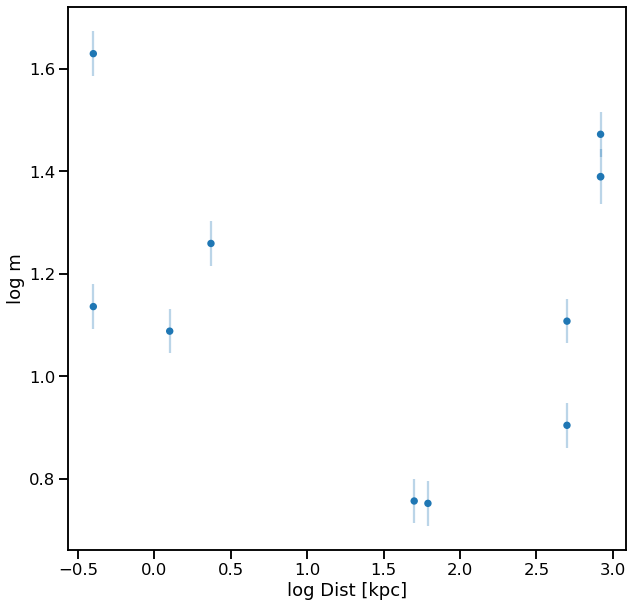

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log Dist [kpc]", ylabel=r"log m",
)
#ax.set_aspect("equal")
#sns.despine()

In [72]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.049
Model:                            WLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                    0.4078
Date:                Thu, 14 Oct 2021   Prob (F-statistic):              0.541
Time:                        18:30:27   Log-Likelihood:                -1.2727
No. Observations:                  10   AIC:                             6.545
Df Residuals:                       8   BIC:                             7.151
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2067      0.141      8.

sig vs siglos

In [73]:
X, Y, Ye = [logdata[_] for _ in ['log siglos [km/s]', 'log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log siglos [km/s]')]

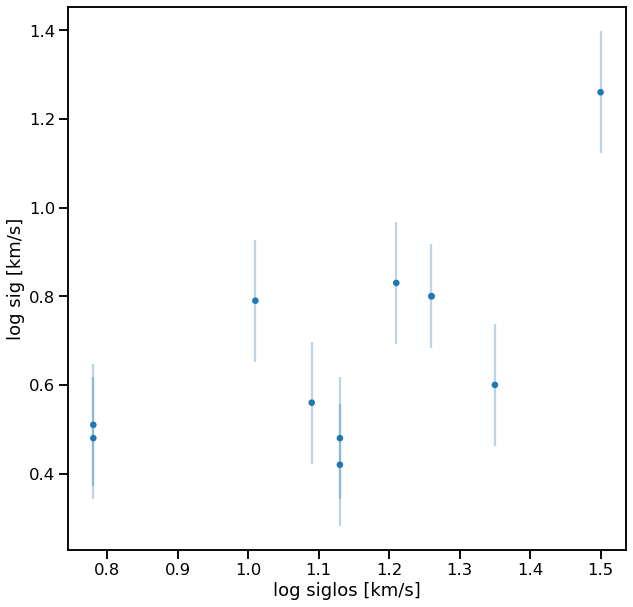

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log siglos [km/s]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [75]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.441
Model:                            WLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     6.320
Date:                Thu, 14 Oct 2021   Prob (F-statistic):             0.0361
Time:                        18:30:27   Log-Likelihood:                 3.0449
No. Observations:                  10   AIC:                            -2.090
Df Residuals:                       8   BIC:                            -1.485
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1562      0.33

L vs siglos

In [76]:
Moiseev=pd.read_csv('DataOthers//Moiseev2015.csv')
Ostin=pd.read_csv('DataOthers//Ostin2001.csv')
Blasco=pd.read_csv('DataOthers//Blasco2013.csv')
Rozas=pd.read_csv('DataOthers//Rozas2006.csv')
Ars=pd.read_csv('DataOthers//ArsRoy1986.csv')
Wis=pd.read_csv('DataOthers//Wis2012.csv')
Gal=pd.read_csv('DataOthers//Gallagher1983.csv')

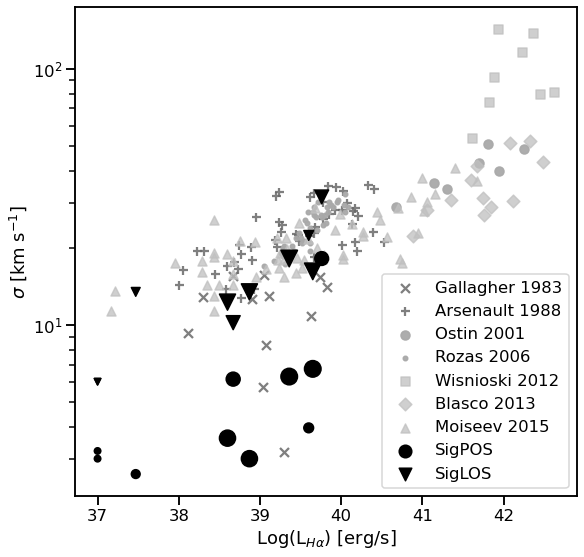

In [77]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


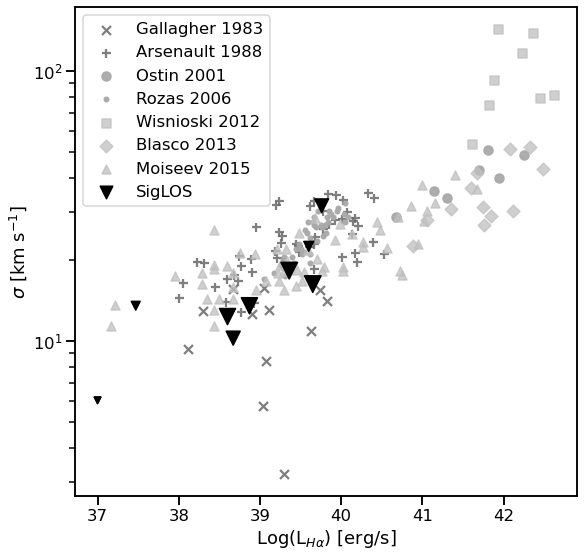

In [78]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')

In [79]:
globalL= pd.concat([Moiseev.L, Ostin.L.dropna(),Blasco.L.dropna(),Rozas.L.dropna(),Ars.L.dropna(),Wis.L.dropna(),Gal.L.dropna()], axis=0)
globalS= pd.concat([Moiseev.sig, Ostin.sig.dropna(),Blasco.sig.dropna(),10**Rozas.sig.dropna(),10**Ars.sig.dropna(),Wis.sig.dropna(),Gal.sig.dropna()],  axis=0)
GL=np.concatenate((np.array(globalL), np.array(logdata['log L(H) [erg s^-1]'])))
GS=np.concatenate((np.array(globalS), np.array(10**(logdata['log siglos [km/s]']))))

[Text(0, 0.5, 'Log$σ$ [km s$^{-1}$]'), Text(0.5, 0, 'Log(L$_{Hα}$) [erg/s]')]

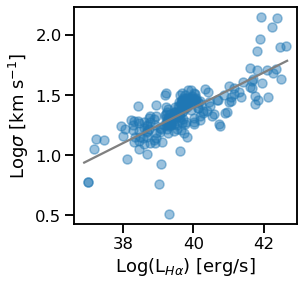

In [80]:
fig, ax=plt.subplots(figsize=(4,4))


plt.scatter(GL, np.log10(GS),alpha=0.45)

x2=np.logspace(1.567,1.63)
y2=-4.4928+0.1472*x2
plt.plot(x2,y2, color='gray')

ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='Log$σ$ [km s$^{-1}$]')


In [81]:
GSer = (GS*.05)/GS

In [82]:
GLer = (GL*.05)/GL

In [83]:
X, Xe, Y, Ye = [GL, GLer, np.log10(GS), GSer]

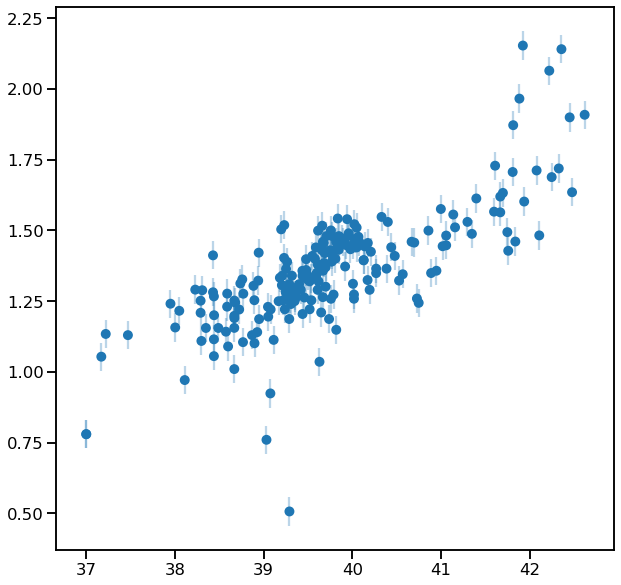

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
#plt.xscale('log')
#plt.yscale('log')

In [85]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [86]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99565988 0.99593001 0.99369461 1.02272926 0.99959774 0.99436724]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99802175 0.99807731 0.99698094 1.00301057 0.99931079 0.99829627]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00343294 1.0034839  0.99841701 1.00407912 0.99952533 1.00332585]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00055577 1.00055333 0.99958635 1.00861912 0.99979119 1.00305126]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00365364 1.00366332 0.99983173 1.00535864 0.9992107  1.00360209]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00381249 1.00377733 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00018395 1.00017968 1.0004126  1.00044657 0.99982686 1.00000508]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00014991 1.00014735 1.00042816 1.00063458 0.9998378  1.00001991]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00007103 1.00006874 1.00039185 1.00061538 0.99983321 1.00001777]


In [87]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-4.883416,0.157198,0.013882,"[0.657449401850299, 0.34255059814970096]","[39.86006154095946, 39.61383201365347]","[1.7723749193561518, 0.0789326627848339]",39.825696,0.010730,0.048960,39.775715,1.098153,0.825957
1,-4.140638,0.138304,0.015609,"[0.6754469973750978, 0.3245530026249023]","[39.83350030619207, 39.62861664250411]","[1.5080353949676215, 0.10329323851403512]",39.819524,0.103747,0.133329,39.767005,1.030206,0.751887
2,-5.070280,0.161523,0.020514,"[0.6805646214552876, 0.3194353785447124]","[39.72519293320805, 39.62780358214205]","[1.650246657503886, 0.09407216915794497]",39.643371,0.028084,0.081559,39.694083,1.074808,0.771366
3,-4.909502,0.157537,0.015370,"[0.6291649745657661, 0.3708350254342338]","[39.72906077310462, 39.60574382761246]","[2.0709314089639896, 0.09034160191869244]",39.847592,0.043890,0.122535,39.683331,1.157587,0.826993
4,-4.483003,0.146906,0.015392,"[0.6510699190863529, 0.3489300809136472]","[39.66243845413339, 39.544085966328005]","[2.2124608270989157, 0.10087779181680696]",39.528782,0.030156,0.080519,39.621142,1.216079,0.821361
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.172060,0.138882,0.016130,"[0.42974106877898943, 0.5702589312210106]","[40.41913187529786, 39.43646038710259]","[2.2716447114866614, 0.312743428900348]",40.666123,0.233573,0.724620,39.858755,1.179495,0.790300
9996,-4.576908,0.149736,0.016946,"[0.4865835533750637, 0.5134164466249364]","[40.257646538696996, 39.3639770411979]","[2.7156771229811314, 0.33396514232932206]",39.368660,0.393330,0.477779,39.798822,1.300917,0.831427
9997,-4.549604,0.148454,0.014815,"[0.40757279226790943, 0.5924272077320906]","[40.330480303109965, 39.41083076359277]","[1.915487507646303, 0.2942618341797562]",40.662917,1.095221,1.228684,39.785655,1.076681,0.795584
9998,-4.404289,0.144730,0.016971,"[0.4470480138226404, 0.5529519861773595]","[40.008872915688194, 39.52073993296247]","[2.0716983348044793, 0.3059885681325455]",39.365345,0.497867,0.444060,39.738959,1.074358,0.766534


In [88]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.505391,0.147549,0.015494,39.981872,0.672055,0.682540,39.747158,1.109993,0.794796
std,0.335883,0.008450,0.001832,0.697435,0.490881,0.560568,0.078464,0.067058,0.029893
min,-5.720598,0.118255,0.009678,36.318227,0.002515,0.006867,39.445834,0.899296,0.660113
25%,-4.730912,0.141878,0.014192,39.547081,0.246727,0.285772,39.694168,1.063372,0.775723
50%,-4.505602,0.147562,0.015370,39.867917,0.566323,0.531710,39.745868,1.107153,0.796554
75%,-4.279062,0.153166,0.016638,40.362895,1.021856,0.911021,39.799378,1.153062,0.815539
max,-3.355120,0.178374,0.023805,43.051441,1.833277,5.795852,40.067549,1.393954,0.885544


In [89]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [90]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,39.750147,5.000000e-02,1.359637,5.000000e-02
std,1.105695,4.879636e-17,0.210025,4.875989e-17
min,37.000000,5.000000e-02,0.506911,5.000000e-02
25%,39.156000,5.000000e-02,1.252489,5.000000e-02
50%,39.640500,5.000000e-02,1.349277,5.000000e-02
75%,40.148700,5.000000e-02,1.460000,5.000000e-02
max,42.622000,5.000000e-02,2.153357,5.000000e-02


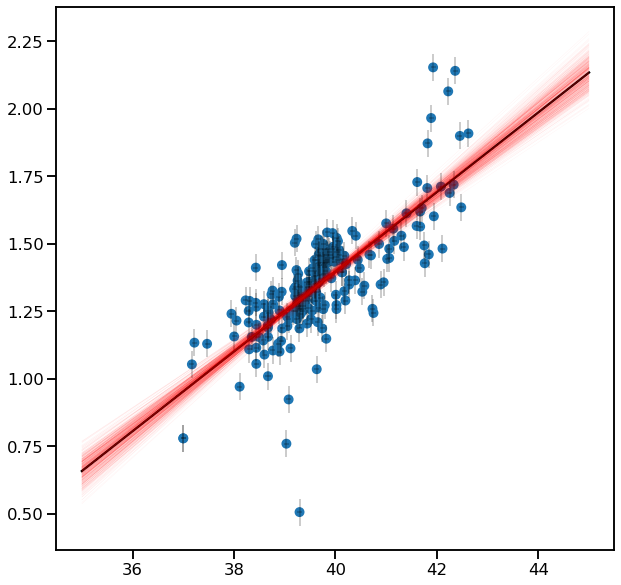

In [91]:
vmin, vmax = 35, 45
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [92]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(-4.505390846096797, 0.14754906838474566)

In [93]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.3358833586753187, 0.008450393689984723)

In [94]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            WLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     304.0
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.80e-42
Time:                        18:30:50   Log-Likelihood:                 123.05
No. Observations:                 204   AIC:                            -242.1
Df Residuals:                     202   BIC:                            -235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4928      0.336    -13.380      0.0

In [95]:
Y, Ye, X, Xe = [GL, GLer, np.log10(GS), GSer]

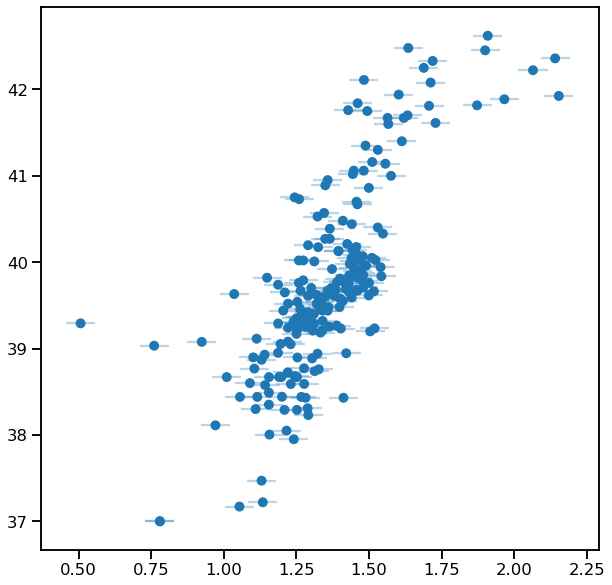

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

In [97]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [98]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99544827 0.99417378 1.01614524 0.99163863 0.99593291 0.9958541 ]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99674785 0.99677448 1.00083115 0.99519014 1.00060438 1.0023279 ]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00027204 1.00024943 0.99728149 0.99676557 1.00404945 1.00111017]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00406091 1.00444574 0.99825895 0.99909664 1.00111607 1.00008308]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00199189 1.00229815 0.99874144 1.00028643 1.00110758 1.00293887]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00063737 1.00087028 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00064836 1.00077206 1.00063136 1.00000727 1.00072152 1.00000852]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00067118 1.00079503 1.00062298 0.99998062 1.00075335 0.99994701]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00071528 1.00083573 1.00058446 0.99998616 1.00065755 0.99995052]


In [99]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,33.352705,4.701946,0.505988,"[0.22010995607816125, 0.7798900439218388]","[1.467409728068891, 1.340904285622761]","[0.12132782930215888, 0.015577287812245233]",1.474765,0.027266,0.026588,1.368749,0.203964,0.803181
1,33.911010,4.297198,0.511992,"[0.23304158038558187, 0.7669584196144182]","[1.543112939020425, 1.3376559945664224]","[0.20935107667555022, 0.014818918020419179]",1.622096,0.043269,0.082110,1.385536,0.260188,0.842283
2,34.380931,3.958548,0.561865,"[0.17364519410813017, 0.8263548058918699]","[1.5493628436537157, 1.3458389454070057]","[0.1490044832556311, 0.014214158603781304]",1.338425,0.027934,0.024798,1.381180,0.208719,0.740625
3,34.030915,4.224882,0.579871,"[0.2551147900711281, 0.7448852099288719]","[1.4337420083574823, 1.3459306128333237]","[0.1538533977848177, 0.017005177147328025]",1.326485,0.026669,0.062323,1.368333,0.231046,0.788463
4,34.106960,4.153521,0.599930,"[0.1833259526488068, 0.8166740473511932]","[1.4166438153810987, 1.356482725155722]","[0.14376116161553684, 0.01289656701352708]",1.400646,0.008266,0.033872,1.367512,0.193467,0.719986
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.221059,4.098663,0.463107,"[0.26629607569193475, 0.7337039243080653]","[1.345841611742321, 1.3482576593753293]","[0.12196776922319663, 0.019634493369819168]",1.391890,0.014348,0.049636,1.347614,0.216533,0.793561
9996,33.724540,4.471689,0.550118,"[0.2093244656874304, 0.7906755343125695]","[1.3758841214930333, 1.3499439108380336]","[0.09451163066947683, 0.011835468673004453]",1.466461,0.044834,0.033208,1.355374,0.171035,0.717872
9997,33.562144,4.537534,0.473241,"[0.1949286798666573, 0.8050713201333428]","[1.3891086496910157, 1.3627860948935673]","[0.1373395410633386, 0.01526617177632068]",1.118209,0.022021,0.018397,1.367917,0.197915,0.793853
9998,34.341585,3.978719,0.458316,"[0.21922242112799686, 0.780777578872003]","[1.2642520834561441, 1.3612373091827255]","[0.18545444723139637, 0.014754824265509801]",1.292761,0.002681,0.003628,1.339976,0.231918,0.806273


In [100]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.934191,4.277453,0.468303,1.375802,0.022650,0.036590,1.357648,0.209142,0.791402
std,0.344142,0.250406,0.051839,0.112605,0.016852,0.028998,0.014795,0.020077,0.035823
min,32.517155,3.315820,0.307102,0.800252,0.000145,0.000208,1.300431,0.156965,0.640693
25%,33.701774,4.109045,0.432158,1.312262,0.008955,0.016061,1.347518,0.195132,0.768275
50%,33.936533,4.277842,0.464985,1.373802,0.018104,0.029327,1.357484,0.207226,0.792625
75%,34.167584,4.445478,0.500498,1.438661,0.033497,0.048415,1.367549,0.220728,0.816286
max,35.190265,5.294073,0.713380,1.923352,0.066146,0.242664,1.427115,0.384765,0.905355


In [101]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [102]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,1.359637,5.000000e-02,39.750147,5.000000e-02
std,0.210025,4.875989e-17,1.105695,4.879636e-17
min,0.506911,5.000000e-02,37.000000,5.000000e-02
25%,1.252489,5.000000e-02,39.156000,5.000000e-02
50%,1.349277,5.000000e-02,39.640500,5.000000e-02
75%,1.460000,5.000000e-02,40.148700,5.000000e-02
max,2.153357,5.000000e-02,42.622000,5.000000e-02


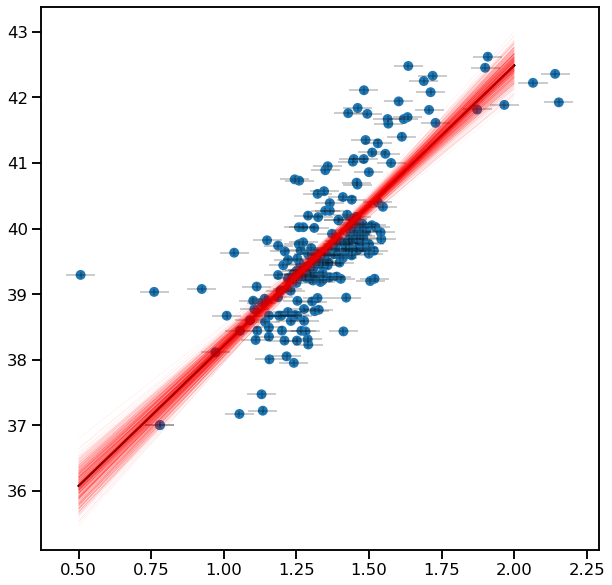

In [103]:
vmin, vmax = 0.5, 2
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.4, lw=0.1)


In [104]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(33.93419072481128, 4.277453219884681)

In [105]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.344141849155397, 0.25040641409002923)

In [106]:
print("--- %s seconds ---" % (time.time()-start_time))


--- 81.760262966156 seconds ---
